# Digit Recognizer

Import the required libraries

In [78]:
import numpy as np 
import tensorflow as tf
import keras
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from keras.models import Sequential
import itertools
from keras.layers import Dense,Dropout,Flatten,Conv2D, MaxPool2D
from sklearn.model_selection import train_test_split

%matplotlib inline

In [56]:
!ls digit-recognizer

sample_submission.csv test.csv              train.csv


In [57]:
random_seed = 2

In [58]:
train = pd.read_csv("digit-recognizer/train.csv")
test = pd.read_csv("digit-recognizer/test.csv")

In [59]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
train.label.count()

42000

In [61]:
y_train = train["label"]

In [62]:
y_train.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

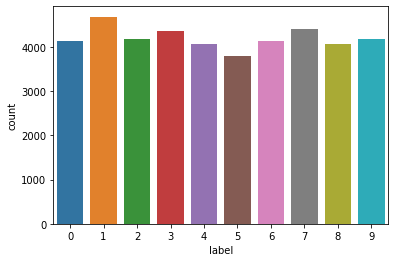

In [63]:
sns.countplot(y_train)

In [64]:
x_train = train.drop(labels = ["label"],axis = 1)

In [65]:
x_train.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [66]:
x_train.describe()
## Values range between 0 and 255 so in order to have a faster rate of convergence we normalize the values to between 0 and 1.

x_train = x_train/255.0
test = test/255.0 ## We apply the transformation to the test as well to maintain consistency

In [67]:
# The data has been inputted as a 784 continous pixel value but we need 28x28x1 pixelexpixelsxchannel

x_train = x_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

In [68]:
print(x_train.shape)

(42000, 28, 28, 1)


In [69]:
x_train, x_val, y_trai,y_val = train_test_split(x_train,y_train, test_size=.1,random_state = random_seed)

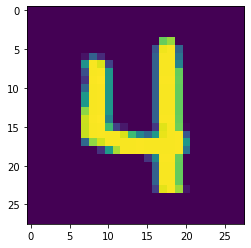

In [70]:
g = plt.imshow(x_train[3700][:,:,0])

In [82]:
model = Sequential()

model.add(Conv2D(filters = 32,kernel_size = (5,5), padding ='Same',
            activation = 'relu',input_shape =(28,28,10)))

model.add(Conv2D(filters= 32, kernel_size = (5,5), padding = 'Same',activation = 'relu'))

model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filter = 64, kernel_size = (3,3), padding = 'Same',
                activation = 'relu'))
model.add(Conv2D(filter = 64, kernel_size = (3,3), padding = 'Same',
                activation = 'relu'))
model.add(MaxPool2D(pool_size =(2,2), strides = (2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation = 'softmax'))


TypeError: __init__() missing 1 required positional argument: 'filters'